In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df_prices = pd.read_csv('idx30_prices_0.csv', index_col=0, parse_dates=True)

df_prices.head()

,BBCA.JK,BBRI.JK,BMRI.JK,TLKM.JK,ASII.JK,UNVR.JK,ICBP.JK,INDF.JK,ANTM.JK,BRPT.JK,...,TKIM.JK,TOWR.JK,UNTR.JK,WIKA.JK,ADRO.JK,BSDE.JK,ELSA.JK,INTP.JK,JPFA.JK,SMGR.JK
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,5820.927734,2960.843506,2800.025635,2864.556152,4718.496094,6994.392578,9761.506836,6266.508301,689.813293,1442.114868,...,9849.019531,688.863525,12383.704102,1954.492554,737.652283,1270.0,214.761948,14673.576172,1253.429688,10497.498047
2020-01-03,5916.637207,2967.556885,2790.993164,2915.839844,4769.970215,7014.843262,9849.054688,6305.796875,698.025391,1402.739868,...,10777.710938,693.168884,12254.107422,2060.925293,755.960571,1290.0,224.717819,14950.811523,1253.429688,10605.054688
2020-01-06,5860.081055,2933.987793,2745.831543,2901.187500,4632.706055,6933.037598,10067.922852,6286.152344,726.767517,1284.614380,...,10899.908203,688.863525,12426.901367,2041.573853,755.960571,1280.0,234.673645,14950.811523,1282.009521,10562.032227
2020-01-07,5864.432129,2954.129395,2745.831543,2886.534912,4649.863281,6912.586426,10067.922852,6443.307129,718.555542,1304.302002,...,11168.739258,701.779846,12239.706055,2051.249512,794.661560,1250.0,231.829102,14970.611328,1359.583252,10583.543945
2020-01-08,5812.226074,2940.701660,2709.702148,2857.229980,4649.863281,6810.329590,10111.696289,6462.951172,743.191650,1260.004883,...,11046.541992,688.863525,12412.503906,2012.546753,776.601074,1220.0,231.829102,14416.146484,1355.500366,10325.409180


In [48]:
daily_returns = df_prices.pct_change().dropna()

In [49]:
annual_returns = daily_returns.mean() * 252

In [50]:
annual_volatility = daily_returns.std() * np.sqrt(252)

In [51]:
summary_df = pd.DataFrame({
    'Annual Return': annual_returns * 100,
    'Annual Volatility': annual_volatility * 100
}).sort_values(by='Annual Return', ascending=False)

In [52]:
summary_df.head(10)

,Annual Return,Annual Volatility
ANTM.JK,40.210119,51.116194
MDKA.JK,30.397300,52.649572
ADRO.JK,29.533244,47.641216
BRPT.JK,28.172085,60.893808
ELSA.JK,24.849090,42.766729
PTBA.JK,24.535685,39.997790
TINS.JK,21.571021,54.467857
UNTR.JK,19.864051,38.345358
BMRI.JK,15.913330,35.151439
JPFA.JK,13.660872,41.375755


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_24344\1709259007.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary_df.index, y='Annual Return', data=summary_df, palette='viridis')


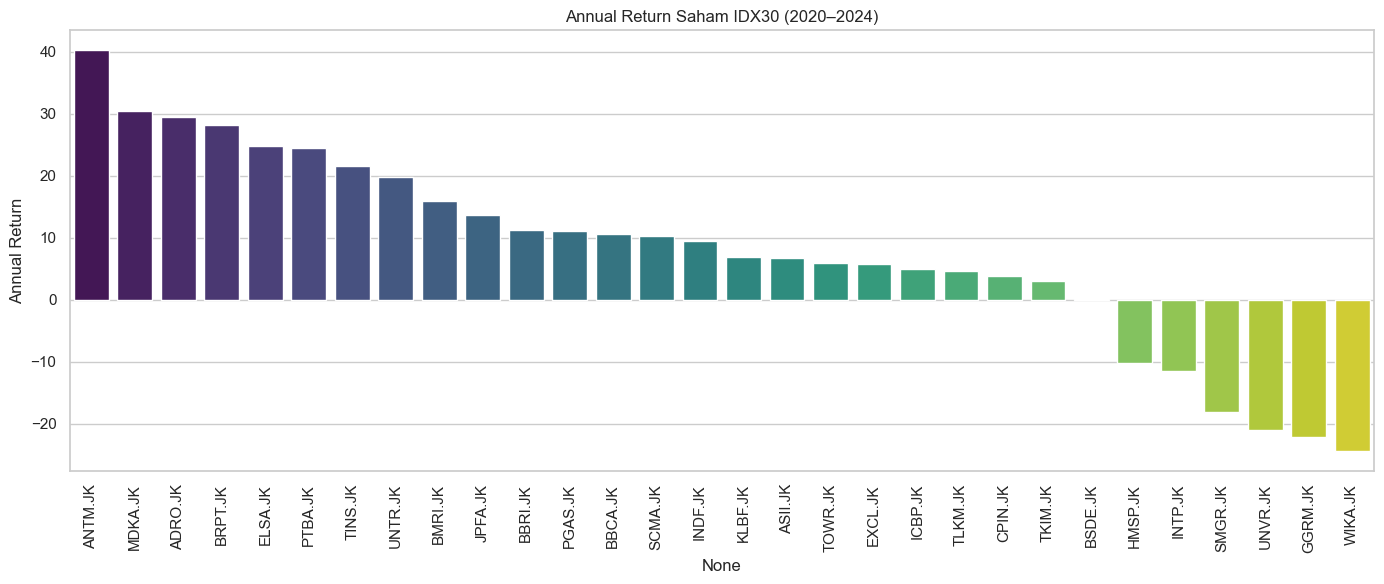

In [53]:
#VISUALIZE
plt.figure(figsize=(14, 6))
sns.barplot(x=summary_df.index, y='Annual Return', data=summary_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Annual Return Saham IDX30 (2020–2024)')
plt.tight_layout()
plt.show()


In [54]:
#SHARPE RATIO

risk_free_rate = 0.035 / 252

mean_daily_return = daily_returns.mean()
std_daily_return = daily_returns.std()

sharpe_ratios = (mean_daily_return - risk_free_rate) / std_daily_return

sharpe_ratios_df = sharpe_ratios.sort_values(ascending=False).to_frame(name='Sharpe Ratio')

sharpe_ratios_df.head(10)

,Sharpe Ratio
ANTM.JK,0.045240
ADRO.JK,0.034423
PTBA.JK,0.033130
MDKA.JK,0.032182
ELSA.JK,0.031447
UNTR.JK,0.026883
BRPT.JK,0.025523
BMRI.JK,0.022246
TINS.JK,0.020900
BBCA.JK,0.016899


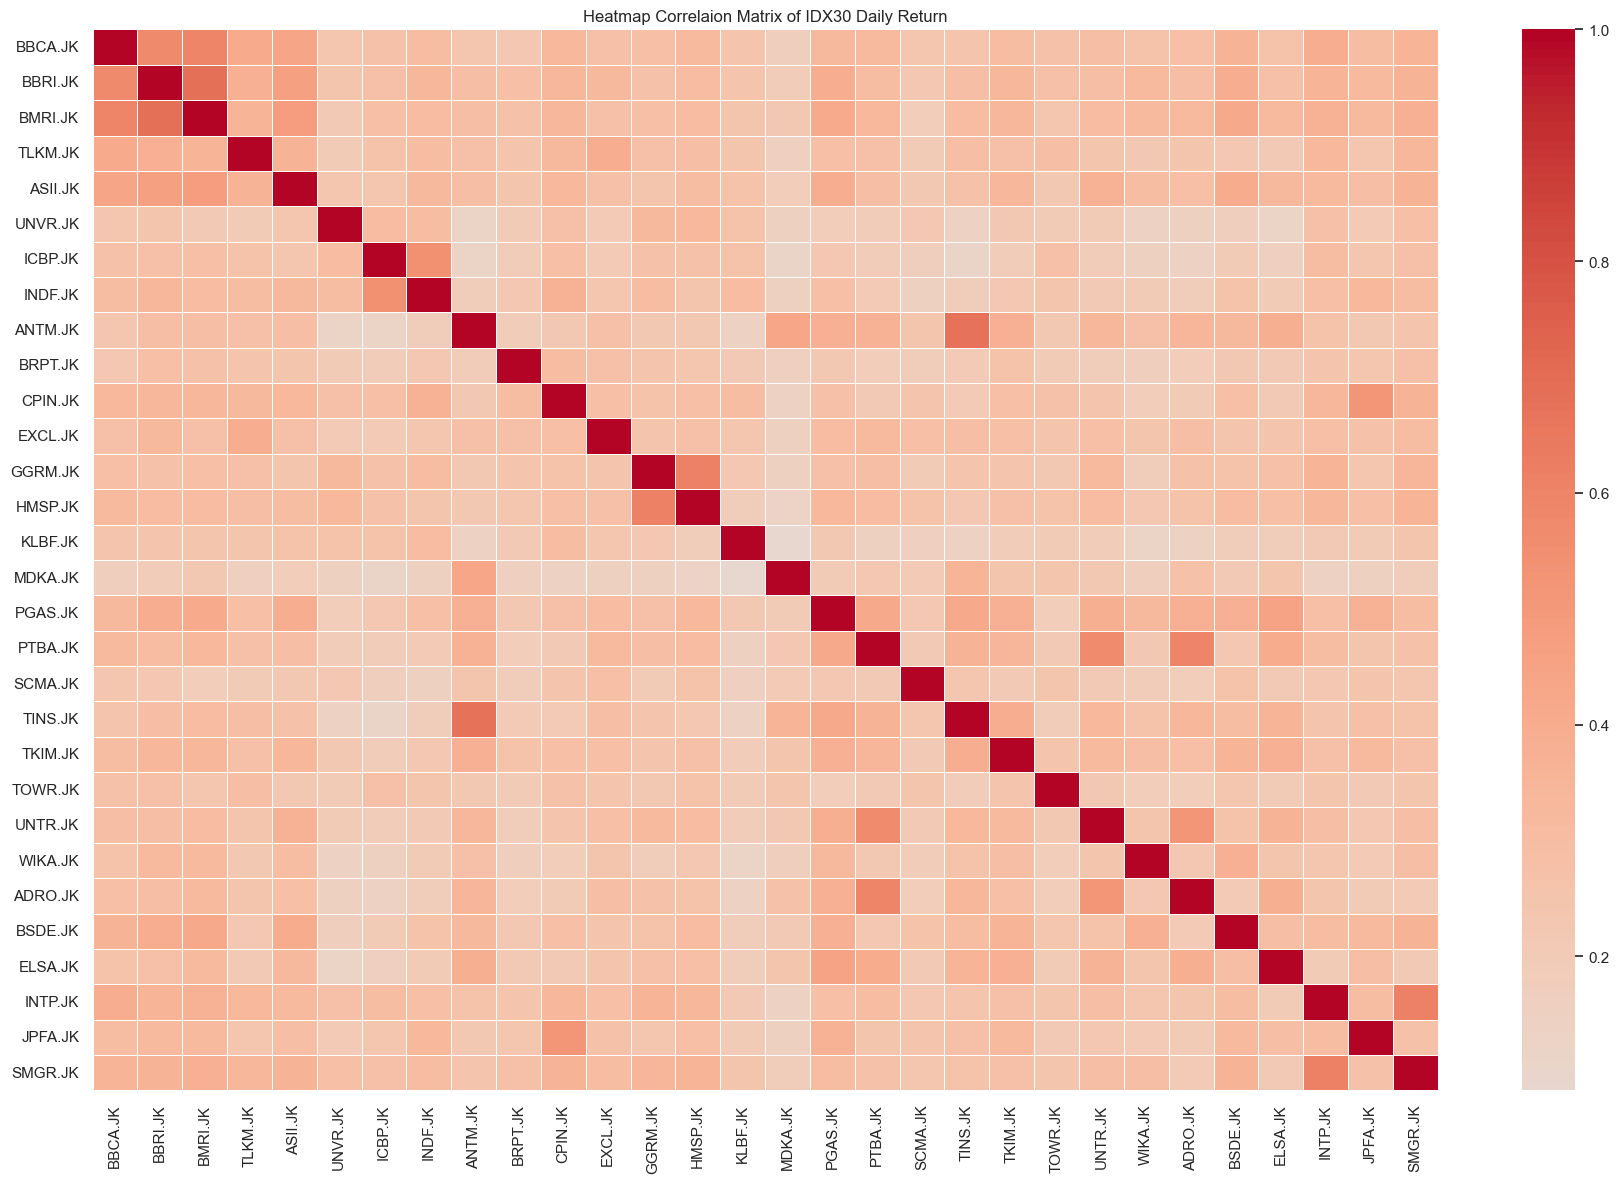

In [55]:
#STOCK CORRELATION

correlation_matrix = daily_returns.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Heatmap Correlaion Matrix of IDX30 Daily Return')
plt.tight_layout()
plt.show()

KeyError: 'Mean Return'

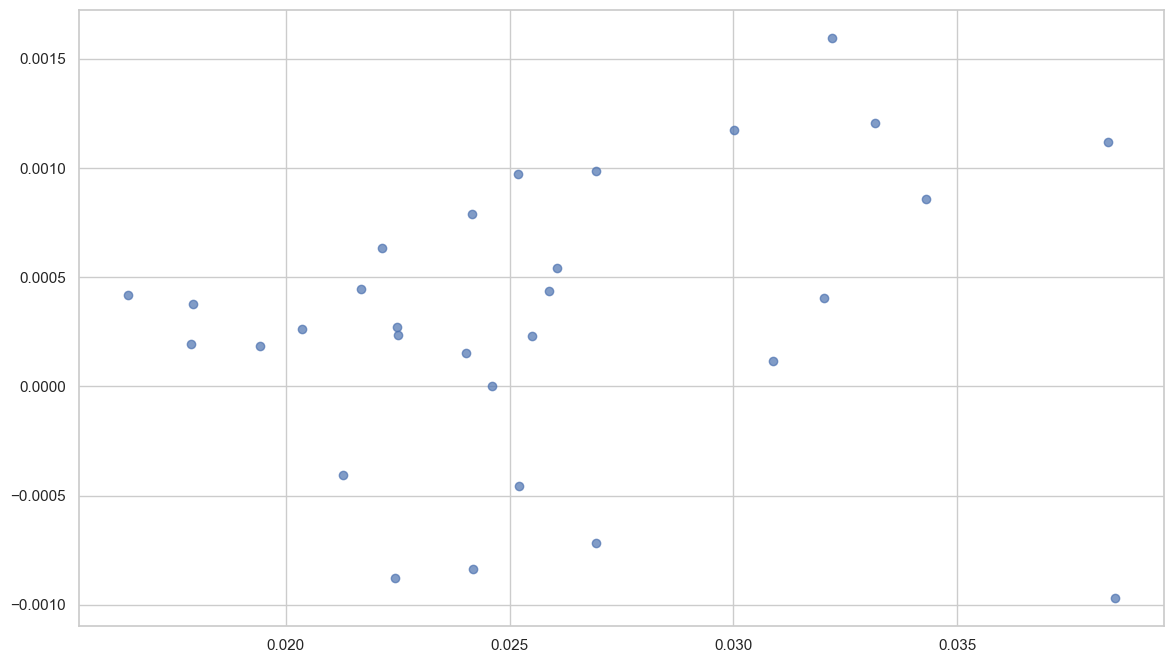

In [56]:
#MEAN-VOLATILITY PLOT

mean_returns = daily_returns.mean()
volatilities = daily_returns.std()

performance_df = pd.DataFrame({
    'Mean Returns' : mean_returns,
    'Volatility' : volatilities,
})

plt.figure(figsize=(14, 8))
plt.scatter(performance_df['Volatility'], performance_df['Mean Returns'], alpha=.7)

for ticker in performance_df.index:
    plt.text(
        performance_df.loc[ticker, 'Volatility'] + 0.001,
        performance_df.loc[ticker, 'Mean Return'],
        ticker,
        fontsize=9
    )

plt.title('Risk vs Return IDX30 Stock 2020–2024', fontsize=16)
plt.xlabel('Volatilitas (Risk)', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_24344\1881766433.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5.index, y='Annual Return', data=top_5, palette='Greens_r')
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_24344\1881766433.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_5.index, y='Annual Return', data=bottom_5, palette='Reds')


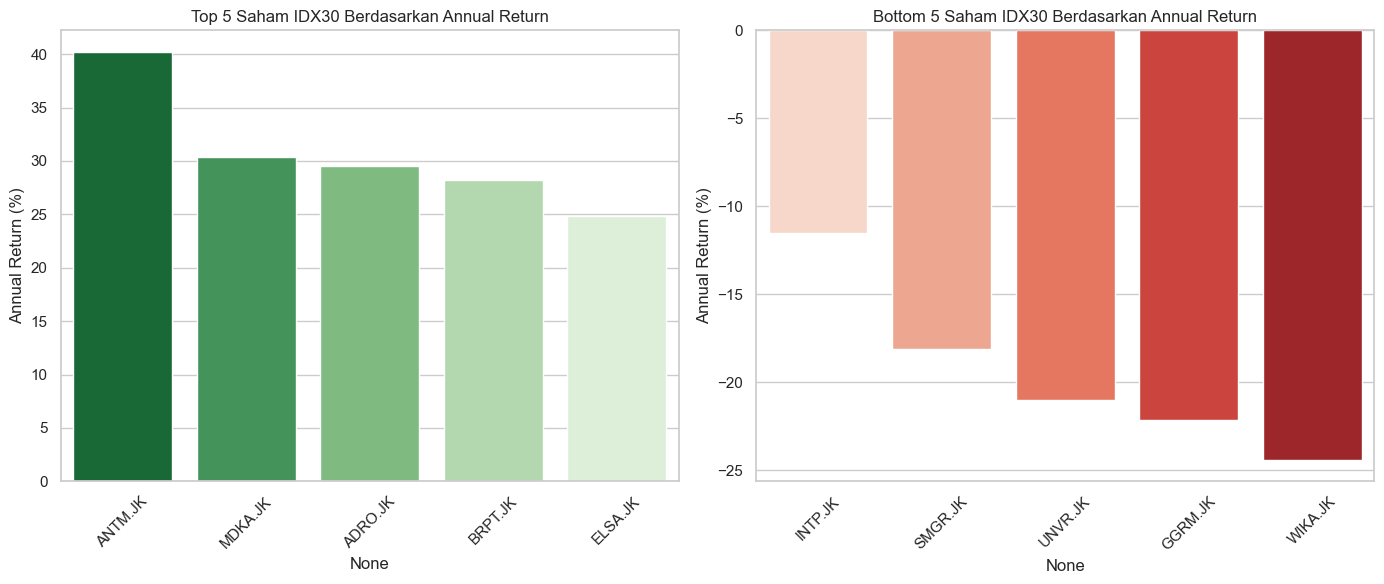

In [58]:
# Mengurutkan berdasarkan Annual Return (%)
summary_df_sorted = summary_df.sort_values(by="Annual Return", ascending=False)

# Top 5 saham
top_5 = summary_df_sorted.head(5)

# Bottom 5 saham
bottom_5 = summary_df_sorted.tail(5)

# Plot
plt.figure(figsize=(14, 6))

# Top 5 plot
plt.subplot(1, 2, 1)
sns.barplot(x=top_5.index, y='Annual Return', data=top_5, palette='Greens_r')
plt.title('Top 5 Saham IDX30 Berdasarkan Annual Return')
plt.xticks(rotation=45)
plt.ylabel('Annual Return (%)')

# Bottom 5 plot
plt.subplot(1, 2, 2)
sns.barplot(x=bottom_5.index, y='Annual Return', data=bottom_5, palette='Reds')
plt.title('Bottom 5 Saham IDX30 Berdasarkan Annual Return')
plt.xticks(rotation=45)
plt.ylabel('Annual Return (%)')

plt.tight_layout()
plt.show()


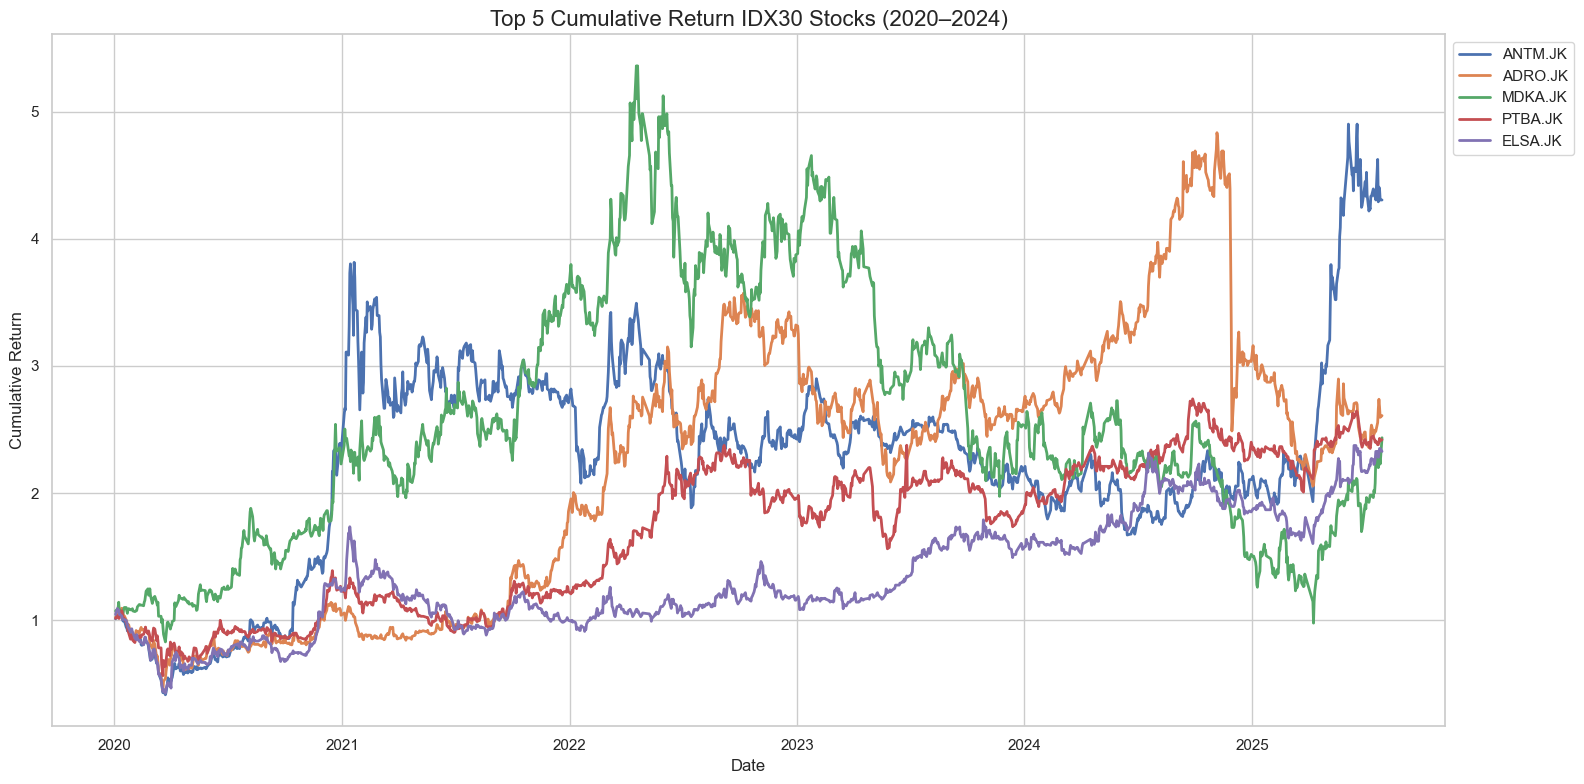

In [59]:
# Hitung cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()

# Ambil cumulative return terakhir untuk masing-masing saham
final_cumulative_returns = cumulative_returns.iloc[-1]

# Ambil 5 saham dengan cumulative return tertinggi
top5_tickers = final_cumulative_returns.sort_values(ascending=False).head(5).index

# Plot hanya untuk 5 saham terbaik
plt.figure(figsize=(16, 8))
for ticker in top5_tickers:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker, linewidth=2)

plt.title('Top 5 Cumulative Return IDX30 Stocks (2020–2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()